# Loan Application Model Building Project

#### In this Term Project, the Loan Application dataset will be analyzed to find out which features are most important or most predictive of defaulting on their next loan payment. The dataset can be downloaded from here: (https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#). People apply for loans everyday to purchase things like property, vehicles, student loans, etc. We will build and evaluate a logistic regression model to predict if a person will default on their next loan payment and describe which features are useful in predicting this.

### Table of Contents
$\bullet$ Exploratory Data Analysis\
$\bullet$ Prepare the Data for Modeling\
$\bullet$ Train and Evaluate the Model

## Libraries and Data Loading

In [55]:
! pip install yellowbrick
import yellowbrick

In [132]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [78]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

## Exploratory Data Analysis (EDA)

In [79]:
#load the dataset into a dataframe
data = pd.read_excel ('default of credit card clients.xls')
# Transform first row into header
new_header = data.iloc[0] #grab the first row for the header
data = data[1:] #take the data less the header row
data.columns = new_header #set the header row as the df header
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [80]:
#look at the column data types
data.dtypes

0
ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [81]:
#display the dimensions of the dataframe
data.shape

(30000, 25)

### Observations
$\bullet$ The dataset has $30000$ rows and $25$ columns \
$\bullet$ All the features will be useful in this analysis. Any categorical features will have dummy variables assigned to them for modeling \
$\bullet$ There is a mix of numerical and categorical data \
$\bullet$ The target of the model will be 'default payment next month': 1 means Yes and 0 means No default payment next month

In [82]:
#get summary statistics of the non-numerical data (categorical)
data.describe(include = ['O'])

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [83]:
#get summary statistics of the numerical data
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### Observations
$\bullet$ There are no missing data to deal with (all features have 30000 observations which make them complete)

## Data Transformation

In [84]:
# change target variable name to DEFAULT
data = data.rename(columns={'default payment next month': 'DEFAULT'})
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [85]:
# change numerical features to float
num_features = ['LIMIT_BAL', 'AGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT']
#data[num_features] = data[num_features].apply(pd.to_numeric, errors='coerce', axis=1)
data[num_features] = data[num_features].astype('float64')

In [86]:
# Check the numerical features in the dataset
print(num_features)

['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT']


In [87]:
# Update negative values to 0 (A negative credit card balance is when your balance is below zero, which means the credit card company owes you money instead of you owing them)
num = data._get_numeric_data()
num[num < 0] = 0
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,1,20000.0,2,2,1,24.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2,120000.0,2,2,2,26.0,0.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3,90000.0,2,2,2,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,4,50000.0,2,2,1,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,5,50000.0,1,2,1,57.0,0.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [88]:
#look at the updated column data types
data.dtypes

0
ID            object
LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE          float64
PAY_0        float64
PAY_2        float64
PAY_3        float64
PAY_4        float64
PAY_5        float64
PAY_6        float64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT      float64
dtype: object

## Numerical Data Feature Exploration

In [89]:
# Create variables num_features_1-5 that group the various numerical features to then visualize
num_features_1 = ['LIMIT_BAL', 'AGE','DEFAULT', 'PAY_0'] 
num_features_2 = ['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5'] 
num_features_3 = ['PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3'] 
num_features_4 = ['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1']
num_features_5 = ['PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'] 

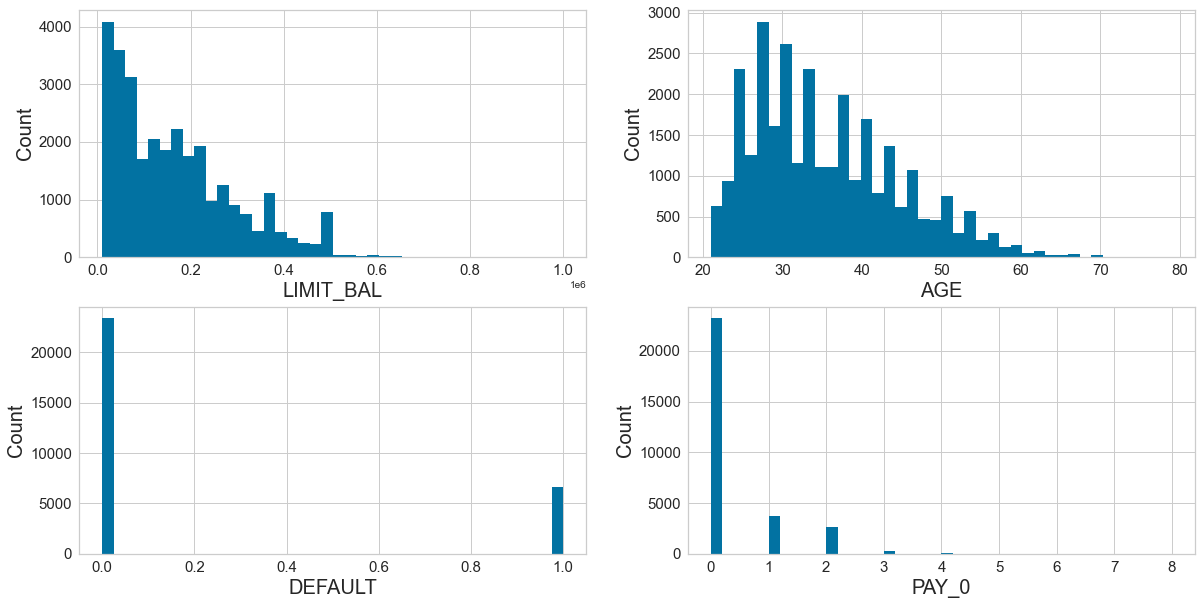

In [90]:
#get histograms of the numerical features
#set the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# Specify the features of interest
num_features_1
xaxes = num_features_1
yaxes = ['Count', 'Count', 'Count', 'Count']
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features_1[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    #ax.xaxis.label.set_color('white')
    ax.set_ylabel(yaxes[idx], fontsize=20)
   # ax.yaxis.label.set_color('white')
    ax.tick_params(axis='both', labelsize=15) #colors='white')
plt.show()

### Observations
$\bullet$Most people in the dataset have a Limit Balance between 4000 and 1000 dollars\
$\bullet$Most people in the dataset are between the ages of 25 and 45 years\
$\bullet$Most people in the dataset do not default on their next loan payment\
$\bullet$Most people in the dataset pay their loan payments on time in the first month

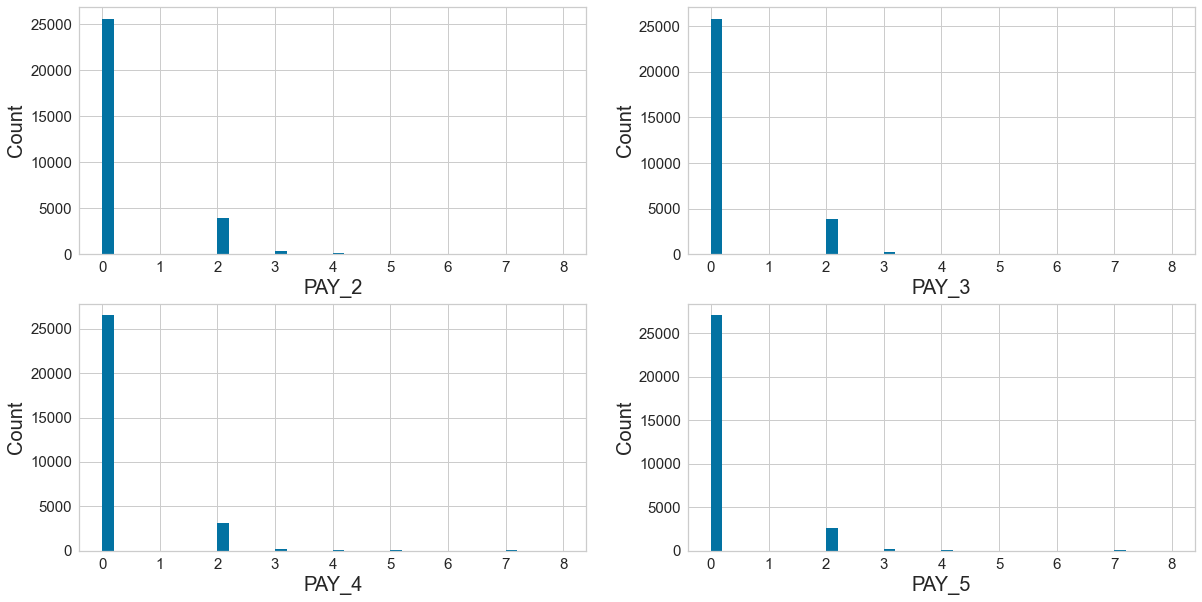

In [91]:
#get histograms of the numerical features
#set the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# Specify the features of interest
num_features_2
xaxes = num_features_2
yaxes = ['Count', 'Count', 'Count', 'Count']
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features_2[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    #ax.xaxis.label.set_color('white')
    ax.set_ylabel(yaxes[idx], fontsize=20)
   # ax.yaxis.label.set_color('white')
    ax.tick_params(axis='both', labelsize=15) #colors='white')
plt.show()

### Observations
$\bullet$Most people in the dataset pay their loan payments on time in the second month\
$\bullet$Most people in the dataset pay their loan payments on time in the third month\
$\bullet$Most people in the dataset pay their loan payments on time in the fourth month\
$\bullet$Most people in the dataset pay their loan payments on time in the fifth month

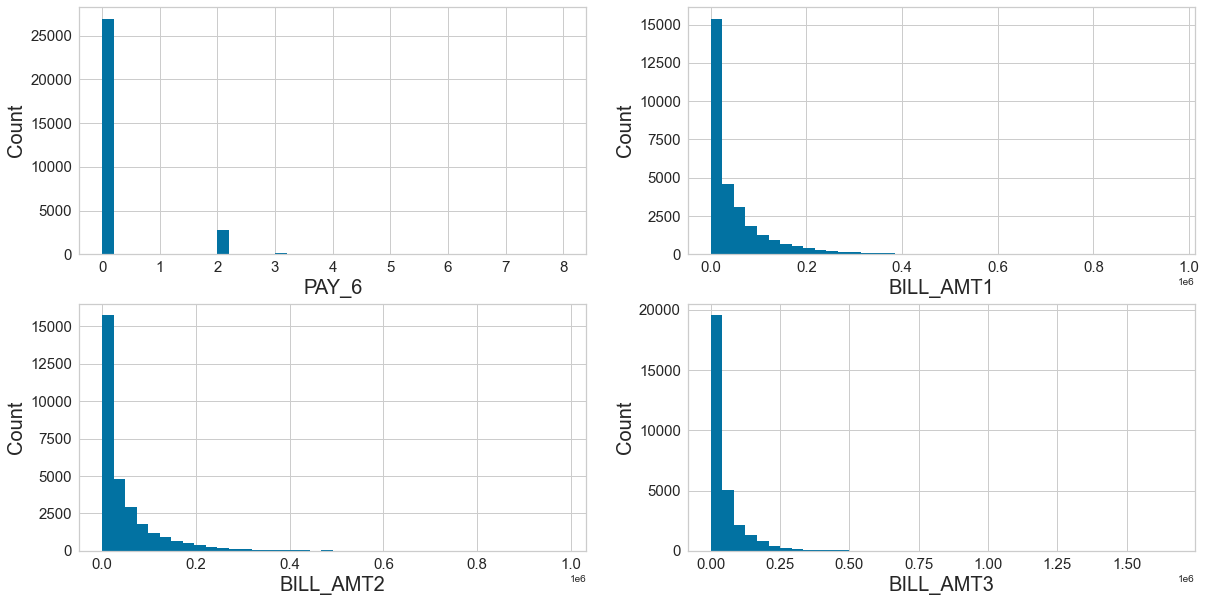

In [92]:
#get histograms of the numerical features
#set the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# Specify the features of interest
num_features_3
xaxes = num_features_3
yaxes = ['Count', 'Count', 'Count', 'Count']
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features_3[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    #ax.xaxis.label.set_color('white')
    ax.set_ylabel(yaxes[idx], fontsize=20)
   # ax.yaxis.label.set_color('white')
    ax.tick_params(axis='both', labelsize=15) #colors='white')
plt.show()

### Observations
$\bullet$Most people in the dataset pay their loan payments on time in the sixth month\
$\bullet$Most people in the dataset have a bill payment amount between 0 and 20000 dollars in the first month\
$\bullet$Most people in the dataset have a bill payment amount between 0 and 20000 dollars in the second month\
$\bullet$Most people in the dataset have a bill payment amount between 0 and 25000 dollars in the third month

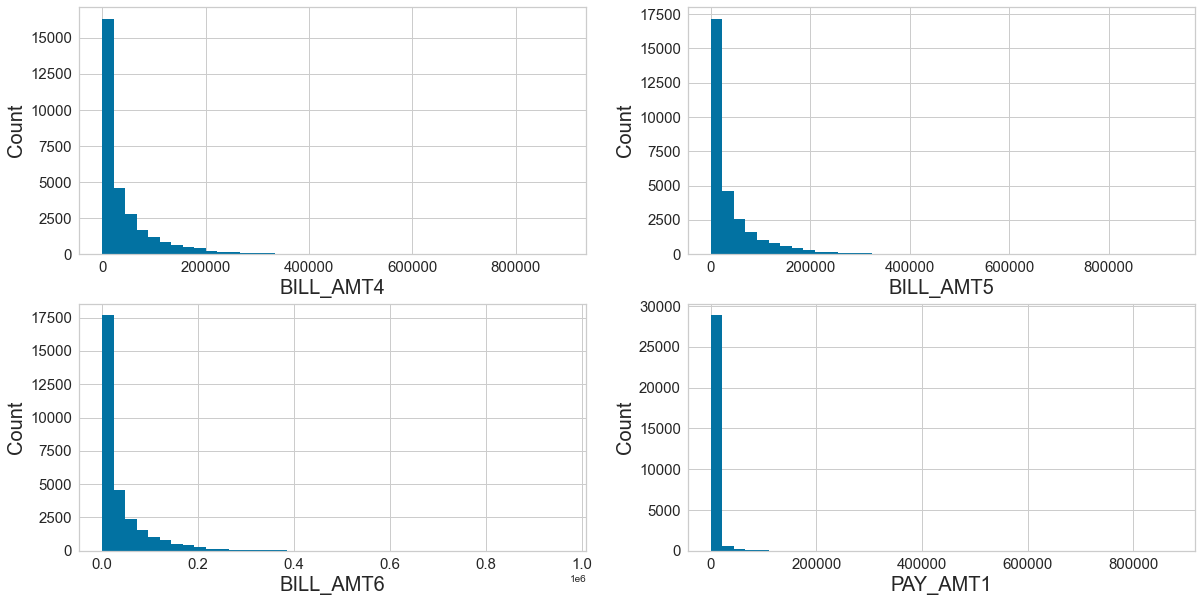

In [93]:
#get histograms of the numerical features
#set the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# Specify the features of interest
num_features_4
xaxes = num_features_4
yaxes = ['Count', 'Count', 'Count', 'Count']
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features_4[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    #ax.xaxis.label.set_color('white')
    ax.set_ylabel(yaxes[idx], fontsize=20)
   # ax.yaxis.label.set_color('white')
    ax.tick_params(axis='both', labelsize=15) #colors='white')
plt.show()

### Observations
$\bullet$Most people in the dataset have a bill payment amount between 0 and 20000 dollars in the fourth month\
$\bullet$Most people in the dataset have a bill payment amount between 0 and 20000 dollars in the fifth month\
$\bullet$Most people in the dataset have a bill payment amount between 0 and 20000 dollars in the sixth month\
$\bullet$Most people in the dataset have a loan payment amount between 0 and 100000 dollars in the first month

IndexError: list index out of range

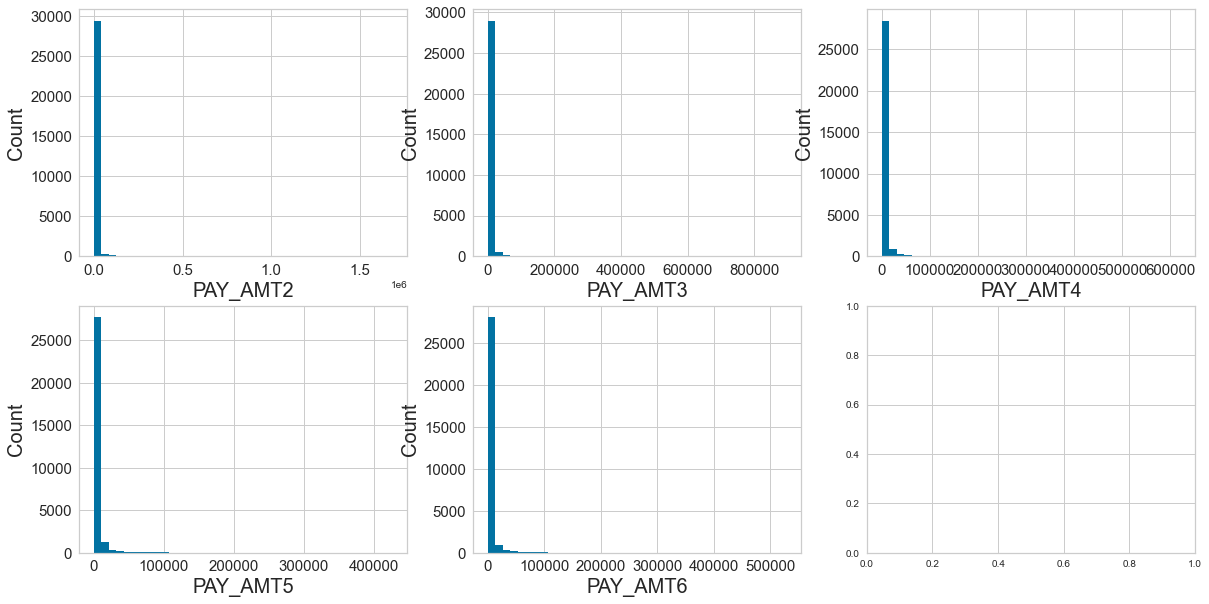

In [94]:
#get histograms of the numerical features
#set the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3)
# Specify the features of interest
num_features_5
xaxes = num_features_5
yaxes = ['Count', 'Count', 'Count', 'Count', 'Count']
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features_5[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    #ax.xaxis.label.set_color('white')
    ax.set_ylabel(yaxes[idx], fontsize=20)
   # ax.yaxis.label.set_color('white')
    ax.tick_params(axis='both', labelsize=15) #colors='white')
plt.show()

### Observations
$\bullet$Most people in the dataset have a loan payment amount between 0 and 25000 dollars in the second month\
$\bullet$Most people in the dataset have a loan payment amount between 0 and 100000 dollars in the third month\
$\bullet$Most people in the dataset have a loan payment amount between 0 and 50000 dollars in the fourth month\
$\bullet$Most people in the dataset have a loan payment amount between 0 and 50000 dollars in the fifth month\
$\bullet$Most people in the dataset have a loan payment amount between 0 and 50000 dollars in the sixth month

### Heat map of the Pearson correlation coefficients of the numerical features

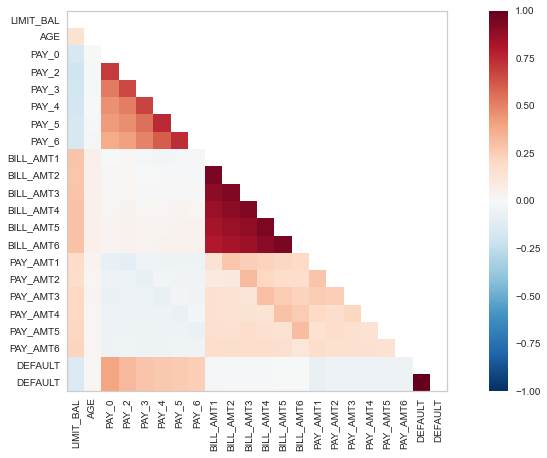

In [95]:
#create a heat map of the Pearson correlation coefficients of the numerical features
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

heat_map_features = num_features.copy()
#add 'default payment next month' to the heat map features
heat_map_features.append('DEFAULT')
# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[heat_map_features].values

# instantiate the visualizer 
heat_map = Rank2D(features=heat_map_features, algorithm='pearson')
heat_map.fit_transform(X) #fit and tranform the data for the heat map
plt.show()    

### Observations
$\bullet$ The numerical feature most highly correlated with 'DEFAULT' is 'PAY_0', followed by PAY_2-PAY_6\
$\bullet$ There is not significant collinearity between the features (Rule of thumb: If the correlation > 0.8 then severe multicollinearity may be present)

## Categorical Data Feature Exploration

### Spearman Correlation Matrix of Categorical Variables

In [96]:
# To support the Spearman Correlation Matrix, create dummy variables for the object type columns to get all the drop-down options into their own columns
df2 = pd.concat([data.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'DEFAULT'], axis=1), pd.get_dummies(data[['SEX', 'EDUCATION', 'MARRIAGE', 'DEFAULT']])], axis=1)
df2.head(5)

C:\Users\adamska\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
1,1,20000.0,24.0,2.0,2.0,0.0,0.0,0.0,0.0,3913.0,...,0,1,0,0,0,0,0,1,0,0
2,2,120000.0,26.0,0.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,0,1,0,0,0,0,0,0,1,0
3,3,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,0,1,0,0,0,0,0,0,1,0
4,4,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,0,1,0,0,0,0,0,1,0,0
5,5,50000.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,8617.0,...,0,1,0,0,0,0,0,1,0,0


In [97]:
# move DEFAULT to the first column spot
column_to_reorder = df2.pop('DEFAULT')
df2.insert(0, 'DEFAULT', column_to_reorder)
df2.head(5)

,DEFAULT,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
1,1.0,1,20000.0,24.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
2,1.0,2,120000.0,26.0,0.0,2.0,0.0,0.0,0.0,2.0,...,0,1,0,0,0,0,0,0,1,0
3,0.0,3,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
4,0.0,4,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
5,0.0,5,50000.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0


In [98]:
# Create a Spearman Correlation Matrix: Relationship between the categorical and non-categorical variables
df2.corr('spearman').style.background_gradient(cmap="Blues")

,DEFAULT,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
DEFAULT,1.000000,-0.169586,0.005149,0.391160,0.338456,0.294262,0.276443,0.267795,0.247234,-0.025796,-0.015970,-0.013021,-0.009019,-0.007343,-0.000604,-0.160493,-0.150977,-0.139388,-0.127979,-0.116587,-0.121444,0.039961,-0.039961,-0.011516,-0.051328,0.036467,0.032403,-0.025397,-0.036695,-0.006397,-0.013158,0.029775,-0.030619,0.009768
LIMIT_BAL,-0.169586,1.000000,0.186485,-0.182430,-0.223767,-0.217512,-0.206347,-0.191925,-0.186558,0.054458,0.048928,0.061042,0.073567,0.081758,0.090088,0.272367,0.278401,0.284468,0.283411,0.293749,0.317459,-0.056995,0.056995,0.012342,0.270240,-0.150246,-0.153490,0.034030,0.005529,-0.007816,-0.007457,0.109498,-0.095486,-0.063654
AGE,0.005149,0.186485,1.000000,-0.012847,-0.020108,-0.024351,-0.015851,-0.025172,-0.029488,0.001078,0.001545,0.001952,-0.003221,-0.000466,0.000355,0.033580,0.044192,0.033356,0.040529,0.038125,0.038977,0.091697,-0.091697,0.010189,-0.089265,-0.072090,0.209152,-0.010738,0.002805,0.033895,0.012499,0.479500,-0.495836,0.078346
PAY_0,0.391160,-0.182430,-0.012847,1.000000,0.681136,0.456119,0.397391,0.373707,0.333656,-0.071413,-0.034642,-0.022792,-0.007841,0.002372,0.007700,-0.294885,-0.208692,-0.181844,-0.161245,-0.141835,-0.154239,0.027149,-0.027149,-0.001806,-0.053171,0.028817,0.039437,-0.016028,-0.021102,-0.011587,-0.000649,0.015839,-0.017075,0.006389
PAY_2,0.338456,-0.223767,-0.020108,0.681136,1.000000,0.634163,0.486952,0.449377,0.402223,0.076551,0.072875,0.082073,0.092970,0.099187,0.099931,-0.292759,-0.150048,-0.112210,-0.096754,-0.078257,-0.088750,0.041837,-0.041837,-0.008991,-0.082217,0.056090,0.043785,-0.025255,-0.026794,-0.012689,0.002281,0.010467,-0.010817,0.000852
PAY_3,0.294262,-0.217512,-0.024351,0.456119,0.634163,1.000000,0.633888,0.490391,0.440377,0.038651,0.071832,0.064948,0.083105,0.092318,0.093092,-0.046280,-0.288847,-0.137746,-0.096930,-0.082147,-0.097635,0.038981,-0.038981,-0.004344,-0.071592,0.046870,0.043665,-0.024429,-0.032172,-0.014367,0.008017,0.000676,-0.002096,0.003575
PAY_4,0.276443,-0.206347,-0.015851,0.397391,0.486952,0.633888,1.000000,0.669643,0.504116,0.048098,0.065707,0.089459,0.095275,0.112634,0.119401,-0.081601,-0.045640,-0.240540,-0.105906,-0.073259,-0.080559,0.036133,-0.036133,-0.003117,-0.068832,0.046656,0.038805,-0.021737,-0.029981,-0.010038,0.006303,0.006439,-0.007470,0.002455
PAY_5,0.267795,-0.191925,-0.025172,0.373707,0.449377,0.490391,0.669643,1.000000,0.668401,0.059059,0.072499,0.089294,0.118789,0.128016,0.139350,-0.090610,-0.070647,-0.039188,-0.191241,-0.075521,-0.071727,0.034718,-0.034718,-0.007156,-0.055695,0.043110,0.026253,-0.019523,-0.027556,-0.013666,0.001797,0.003007,-0.001604,-0.007493
PAY_6,0.247234,-0.186558,-0.029488,0.333656,0.402223,0.440377,0.504116,0.668401,1.000000,0.059141,0.071799,0.085883,0.107158,0.138938,0.140393,-0.072648,-0.081351,-0.053721,-0.002494,-0.188979,-0.081692,0.028244,-0.028244,-0.007303,-0.045287,0.041727,0.014407,-0.016587,-0.028289,-0.013948,0.003841,-0.002909,0.002615,-0.000179
BILL_AMT1,-0.025796,0.054458,0.001078,-0.071413,0.076551,0.038651,0.048098,0.059059,0.059141,1.000000,0.912260,0.859025,0.808985,0.771114,0.736368,0.503899,0.473529,0.441838,0.443181,0.426137,0.411638,0.041476,-0.041476,-0.015608,-0.112611,0.091437,0.013344,-0.008630,0.036457,0.015335,-0.018689,-0.001170,0.002517,0.001156


### Observations
$\bullet$ The categorical features most highly correlated with 'DEFAULT' are 'SEX_1' (male), 'EDUCATION_2' (university), 'EDUCATION_3' (high school), and 'MARRIAGE_1'(married)\
$\bullet$ There is not significant collinearity between the features (Rule of thumb: If the correlation > 0.8 then severe multicollinearity may be present)

## Bar charts of the categorical features

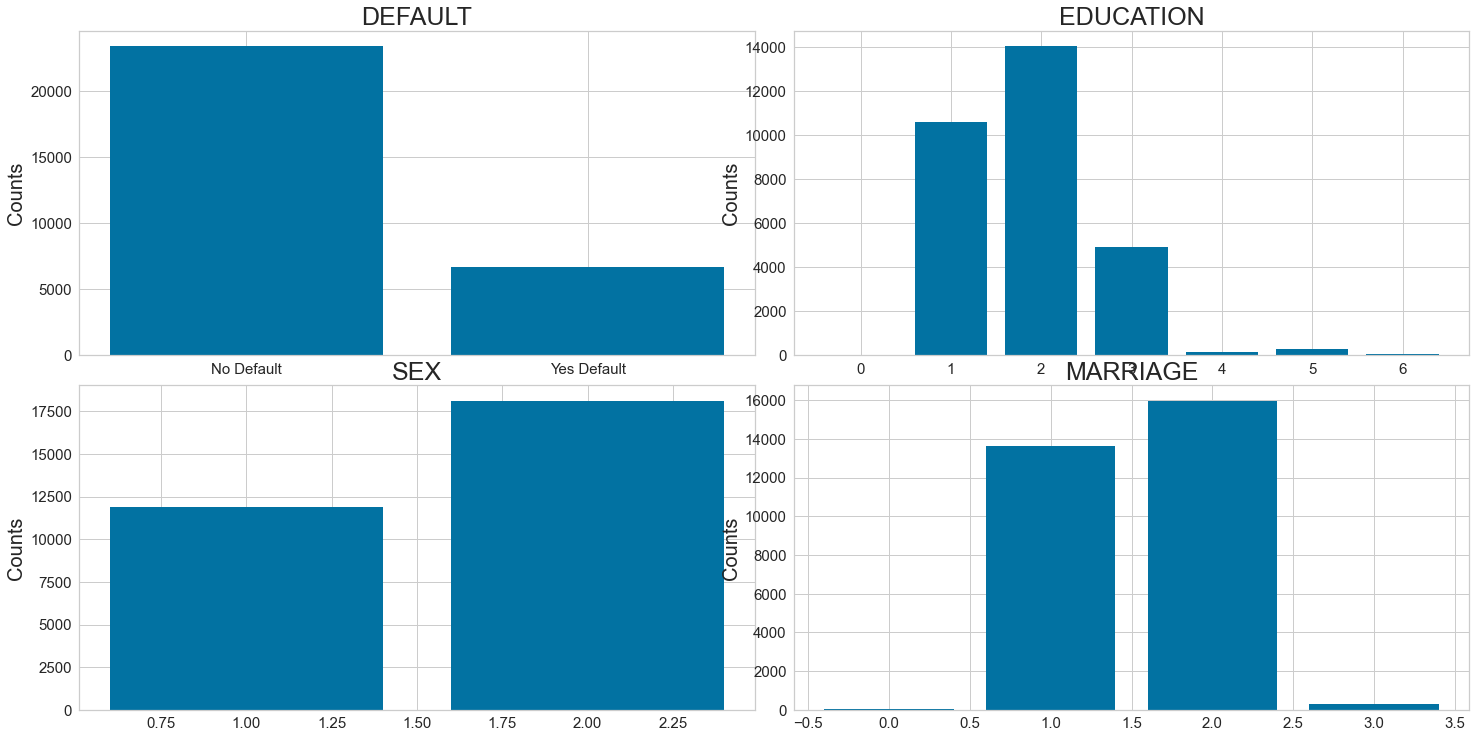

In [107]:
# create bar charts of some of the categorical features
# Categorical features with the highest correlation to HeartDisease: 'DEFAULT' are 'SEX_1' (male), 'EDUCATION_2' (university), 'EDUCATION_3' (high school), and 'MARRIAGE_1'(married)
#create a copy of the data frame for use with graphing
data_plots = data.copy()
data_plots = data.replace({'DEFAULT': {1: 'Yes Default', 0: 'No Default'}})
#data_plots = data.replace({'DEFAULT': {1: 'Yes Default', 0: 'No Default'}}, {'EDUCATION': {1: "Graduate", 2: "University", 3: "High School", 4: "Other", 5: "Other", 6: "Other"}}, {'SEX': {1: 'Male', 2: 'Female'}})

#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.tight_layout()

# make the data read to feed into the visulizer
X_DEFAULT = data_plots.groupby('DEFAULT').size().reset_index(name='Counts')['DEFAULT']
Y_DEFAULT = data_plots.groupby('DEFAULT').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_DEFAULT, Y_DEFAULT)
axes[0, 0].set_title('DEFAULT', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# Categorical features to use:'SEX_1' (male), 'EDUCATION_2' (university), 'EDUCATION_3' (high school), and 'MARRIAGE_1'(married)
# make the data read to feed into the visulizer
X_ED = data_plots.groupby('EDUCATION').size().reset_index(name='Counts')['EDUCATION']
Y_ED = data_plots.groupby('EDUCATION').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_ED, Y_ED)
axes[0, 1].set_title('EDUCATION', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_SEX = data_plots.groupby('SEX').size().reset_index(name='Counts')['SEX']
Y_SEX = data_plots.groupby('SEX').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_SEX, Y_SEX)
axes[1, 0].set_title('SEX', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_MARRIAGE = data_plots.groupby('MARRIAGE').size().reset_index(name='Counts')['MARRIAGE']
Y_MARRIAGE = data_plots.groupby('MARRIAGE').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_MARRIAGE, Y_MARRIAGE)
axes[1, 1].set_title('MARRIAGE', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show()

### Observations
$\bullet$ Most people in the dataset do not default on their next loan payment\
$\bullet$ Most people in the dataset do have a university education (2) followed by graduate education (2) and high school (3)\
$\bullet$ Most people in the dataset are female (2)\
$\bullet$ Most people in the dataset are single (2) followed by married (1)

### Stacked bar charts to Defaulted Loan Payment and no Defaulted Loan Payment by the most correlated features

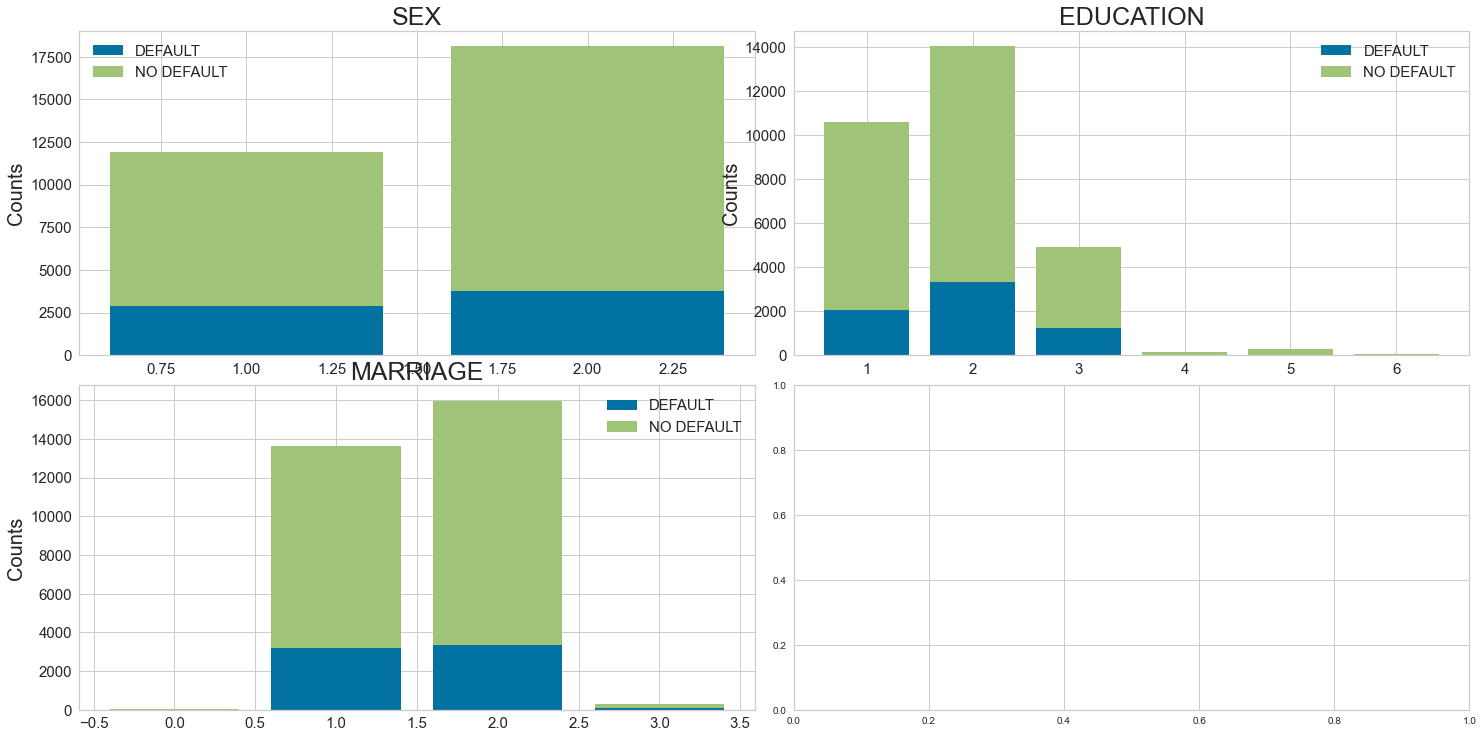

In [108]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.tight_layout()

# make the data read to feed into the visulizer #SEX
SEX_DEFAULT = data_plots[data['DEFAULT']==1]['SEX'].value_counts()
SEX_not_DEFAULT = data_plots[data['DEFAULT']==0]['SEX'].value_counts()
SEX_not_DEFAULT = SEX_not_DEFAULT.reindex(index = SEX_DEFAULT.index)
# make the bar plot
p1 = axes[0, 0].bar(SEX_DEFAULT.index, SEX_DEFAULT.values)
p2 = axes[0, 0].bar(SEX_not_DEFAULT.index, SEX_not_DEFAULT.values, bottom=SEX_DEFAULT.values)
axes[0, 0].set_title('SEX', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('DEFAULT', 'NO DEFAULT'), fontsize = 15)

# make the data read to feed into the visualizer #EDUCATION
ED_DEFAULT = data_plots[data['DEFAULT']==1]['EDUCATION'].value_counts()
ED_not_DEFAULT = data_plots[data['DEFAULT']==0]['EDUCATION'].value_counts()
ED_not_DEFAULT = ED_not_DEFAULT.reindex(index = ED_DEFAULT.index)
# make the bar plot
p3 = axes[0, 1].bar(ED_DEFAULT.index, ED_DEFAULT.values)
p4 = axes[0, 1].bar(ED_not_DEFAULT.index, ED_not_DEFAULT.values, bottom=ED_DEFAULT.values)
axes[0, 1].set_title('EDUCATION', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('DEFAULT', 'NO DEFAULT'), fontsize = 15)

# make the data read to feed into the visualizer #MARRIAGE
MARRIAGE_DEFAULT = data_plots[data['DEFAULT']==1]['MARRIAGE'].value_counts()
MARRIAGE_not_DEFAULT = data_plots[data['DEFAULT']==0]['MARRIAGE'].value_counts()
MARRIAGE_not_DEFAULT = MARRIAGE_not_DEFAULT.reindex(index = MARRIAGE_DEFAULT.index)
# make the bar plot
p5 = axes[1, 0].bar(MARRIAGE_DEFAULT.index, MARRIAGE_DEFAULT.values)
p6 = axes[1, 0].bar(MARRIAGE_not_DEFAULT.index, MARRIAGE_not_DEFAULT.values, bottom=MARRIAGE_DEFAULT.values)
axes[1, 0].set_title('MARRIAGE', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('DEFAULT', 'NO DEFAULT'), fontsize = 15)
plt.show()

### Observations
$\bullet$ Most people in the dataset are female and there are slightly higher loan payment defaults for females because of that\
$\bullet$ Most people in the dataset have a university education (2) and there are slightly higher loan payment defaults for females because of that\
$\bullet$ There are just as many loan defaults in those who are married as those who are single\

## Preparing the Data for Modeling

In [109]:
# get the categorical data
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE']
data_cat = data[cat_features]
#data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
data_cat_dummies.head()

C:\Users\adamska\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
1,0,1,0,0,1,0,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,1,0,0
5,1,0,0,0,1,0,0,0,0,0,1,0,0


In [110]:
# create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# check the data
data_model_X.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
1,20000.0,24.0,2.0,2.0,0.0,0.0,0.0,0.0,3913.0,3102.0,...,0,1,0,0,0,0,0,1,0,0
2,120000.0,26.0,0.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,...,0,1,0,0,0,0,0,0,1,0
3,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,...,0,1,0,0,0,0,0,0,1,0
4,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,...,0,1,0,0,0,0,0,1,0,0
5,50000.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,8617.0,5670.0,...,0,1,0,0,0,0,0,1,0,0


In [111]:
# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'DEFAULT': {1: 'Yes default', 0: 'No default'}})['DEFAULT']

# check the data
data_model_y.head()

1    Yes default
2    Yes default
3     No default
4     No default
5     No default
Name: DEFAULT, dtype: object

In [112]:
#split the data into a training and test set
#we do this before making any modifications to the data to prevent data snooping
#drop 'HeartDisease' from the features as it is the target
X = data.drop(['DEFAULT', 'ID'], axis = 1)
#get the target
y = data['DEFAULT']
#split the data into training and test sets
#split the data into training and test sets (80% Training/20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#reset indices in the training and test sets to prevent pandas slicing warnings
X_train = X_train.reset_index(drop = True) #drop + True drops the previous index
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [113]:
#show the sizes of the training and test sets
print(X_train.shape)
print(X_test.shape)
#see how many have heart disease (1) and don't have heart disease (0) in training and test sets
print(y_train.value_counts())
print(y_test.value_counts())

(24000, 23)
(6000, 23)
0.0    18627
1.0     5373
Name: DEFAULT, dtype: int64
0.0    4737
1.0    1263
Name: DEFAULT, dtype: int64


In [114]:
#look for missing data in the training and test sets
print(X_train.isna().sum())
print(X_test.isna().sum())

0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64
0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64


In [115]:
#create dummy variables for the categorical columns 
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

C:\Users\adamska\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\Users\adamska\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [116]:
#check dimensions of the training and test feature matrices
print(X_train.shape)
print(X_test.shape)
#view the training features
X_train.head()

(24000, 30)
(6000, 30)


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,10000.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,6772.0,7790.0,...,0,1,0,0,0,0,0,0,0,1
1,150000.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,9189.0,4359.0,...,1,0,1,0,0,0,0,0,1,0
2,500000.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,13709.0,5006.0,...,0,1,0,0,0,0,0,1,0,0
3,230000.0,33.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,1,0,0
4,170000.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,13500.0,7499.0,...,1,0,1,0,0,0,0,0,1,0


### Summary of Data Preparation Steps
$\bullet$ Created dummy variables for the categorical data\
$\bullet$ Split data into training and test sets

## Train and Evaluate the Model

In [119]:
#instantiate the logistic regression model 
#logreg_model = LogisticRegression(max_iter = 500)
lr_weight = LogisticRegression(solver='newton-cg', class_weight='balanced')
#fit the model to the training set
lr_weight.fit(X_train, y_train)
# Predicting on the test data
pred_test_weight = lr_weight.predict(X_test)

C:\Users\adamska\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\adamska\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\adamska\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\adamska\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\adamska\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of

Model Accuracy: 77.95%


C:\Users\adamska\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


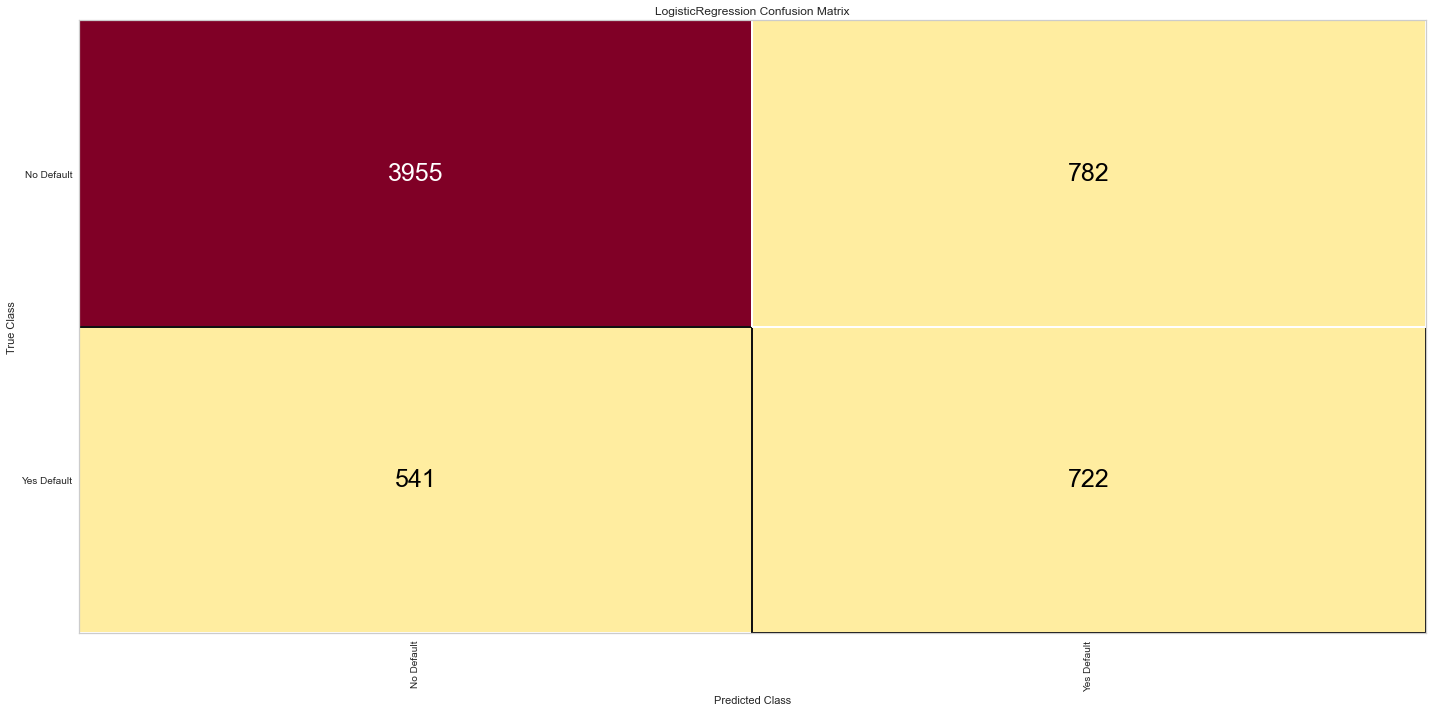

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [120]:
#get model accuracy and create a confusion matrix

#create class labels for confusion matrix
#classes = ['No Heart Disease Reported','Heart Disease Reported']
label_encoder = {0: 'No Default', 1: 'Yes Default'}

#initialize the confusion matrix
cm = ConfusionMatrix(lr_weight, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(X_test, y_test)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(X_test, y_test)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

C:\Users\adamska\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


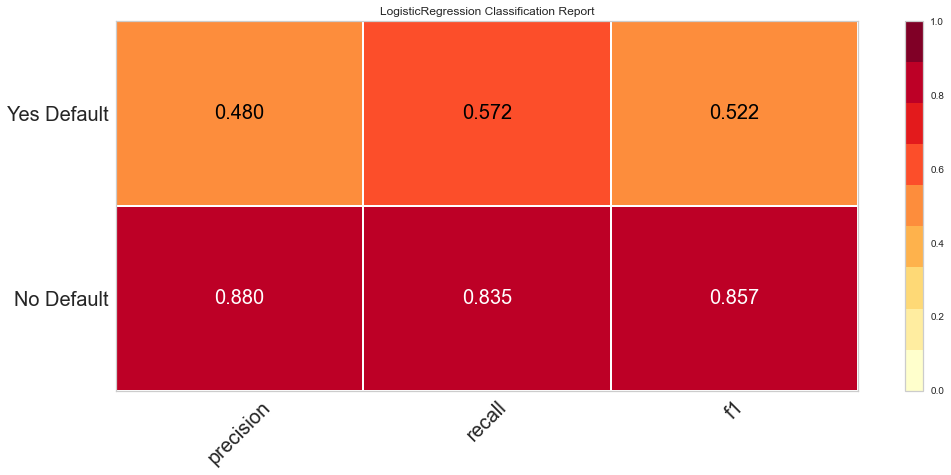

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [121]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(lr_weight, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(X_train, y_test)  
#evaluate the model on the test data
class_report.score(X_test, y_test)  
class_report.show()

C:\Users\adamska\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


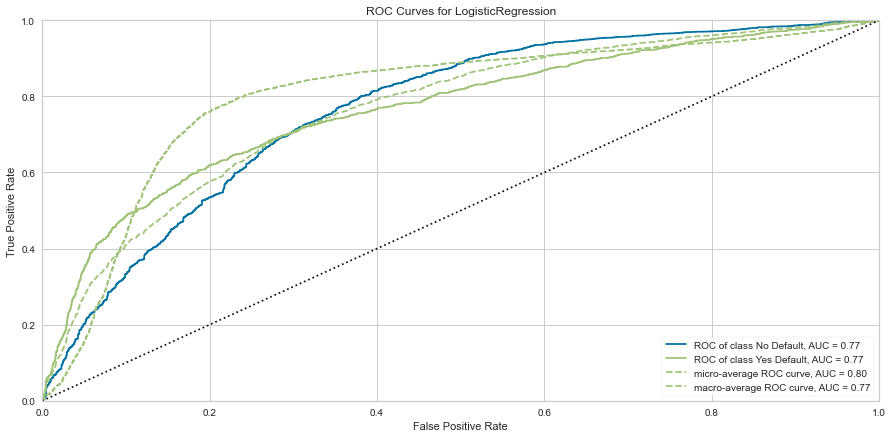

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [122]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(lr_weight, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

### The area under the ROC curve (AUC) results were considered 
$\bullet$ excellent for AUC values between 0.9-1\
$\bullet$ good for AUC values between 0.8-0.9\
$\bullet$ fair for AUC values between 0.7-0.8\
$\bullet$ poor for AUC values between 0.6-0.7\
$\bullet$ failed for AUC values between 0.5-0.6.

### Model Findings
$\bullet$ Logistic Regression model predicts default loan payment next month with 78% accuracy\
$\bullet$ Classification report and ROC all suggest the model has a good predictive power\

### Chi-squared Features: 5 Best Features

In [124]:
data_chi = pd.read_excel ('default of credit card clients.xls')
# Transform first row into header
new_header = data_chi.iloc[0] #grab the first row for the header
data_chi = data_chi[1:] #take the data less the header row
data_chi.columns = new_header #set the header row as the df header
data_chi.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [125]:
# change target variable name to DEFAULT
data_chi = data_chi.rename(columns={'default payment next month': 'DEFAULT'})
data_chi.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [126]:
num_features = ['LIMIT_BAL', 'AGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT']
#data[num_features] = data[num_features].apply(pd.to_numeric, errors='coerce', axis=1)
data_chi[num_features] = data_chi[num_features].astype('float64')

In [127]:
# Replace PAY_0-6 negative values with 0
data_chi = data_chi.replace({'PAY_0': {-2: 0},'PAY_0': {-1: 0},'PAY_1': {-2: 0},'PAY_1': {-1: 0},'PAY_2': {-2: 0},'PAY_2': {-1: 0},'PAY_3': {-2: 0},'PAY_3': {-1: 0},'PAY_4': {-2: 0},'PAY_4': {-1: 0},'PAY_5': {-2: 0},'PAY_5': {-1: 0},'PAY_6': {-2: 0},'PAY_6': {-1: 0}})
data_chi.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,1,20000.0,2,2,1,24.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2,120000.0,2,2,2,26.0,0.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3,90000.0,2,2,2,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,4,50000.0,2,2,1,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,5,50000.0,1,2,1,57.0,0.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [128]:
# Update negative values to 0 (A negative credit card balance is when your balance is below zero, which means the credit card company owes you money instead of you owing them)
num = data_chi._get_numeric_data()
num[num < 0] = 0
data_chi.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,1,20000.0,2,2,1,24.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2,120000.0,2,2,2,26.0,0.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3,90000.0,2,2,2,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,4,50000.0,2,2,1,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,5,50000.0,1,2,1,57.0,0.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [129]:
#split the data into a training and test set
#we do this before making any modifications to the data to prevent data snooping
X_chi = data_chi.drop(['DEFAULT', 'ID'], axis = 1)
#get the target
y_chi = data_chi['DEFAULT']
#split the data into training and test sets
#split the data into training and test sets (80% Training/20% Test)
X_train_chi, X_test_chi, y_train_chi, y_test_chi = train_test_split(X_chi, y_chi, test_size = 0.2)

#reset indices in the training and test sets to prevent pandas slicing warnings
X_train_chi = X_train_chi.reset_index(drop = True) #drop + True drops the previous index
X_test_chi = X_test_chi.reset_index(drop = True)
y_train_chi = y_train_chi.reset_index(drop = True)
y_test_chi = y_test_chi.reset_index(drop = True)

In [130]:
# Create target and feature_names list
features_chi = X_train_chi
target_chi = y_train_chi

In [133]:
# Select 5 features with highest chi-squared statistics
chi2_selector=SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(features_chi, target_chi)

In [134]:
# Show results
print ("Original number of features:", features_chi.shape[1])
print ("Reduced number of features:", features_kbest.shape[1])

Original number of features: 23
Reduced number of features: 5


In [135]:
# Get columns to keep and create new dataframe with those only
cols = chi2_selector.get_support(indices=True)
features_df_new = features_chi.iloc[:,cols]
features_df_new

,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT5
0,150000.0,5300.0,7000.0,6600.0,13500.0
1,30000.0,1205.0,1215.0,471.0,491.0
2,100000.0,28.0,103350.0,1722.0,1300.0
3,360000.0,4062.0,1914.0,4877.0,3602.0
4,150000.0,0.0,0.0,11068.0,189.0
...,...,...,...,...,...
23995,180000.0,2710.0,0.0,2000.0,2000.0
23996,120000.0,1000.0,2000.0,2000.0,1000.0
23997,20000.0,0.0,2000.0,1400.0,0.0
23998,120000.0,3458.0,2519.0,2158.0,2368.0


### Chi-Squared Findings
$\bullet$ The 5 best features (chi-squared) of LIMIT_BAL, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT5 imply that a loan applicant’s Limit Balance and payment history are most influential in predicting if they will default on their next payment.  

## Train and Evaluate the Model with 5 Best Features from X2

In [138]:
#instantiate the logistic regression model 
#logreg_model = LogisticRegression(max_iter = 500)
lr_weight_chi = LogisticRegression(solver='newton-cg', class_weight='balanced')
#fit the model to the training set
lr_weight_chi.fit(X_train_chi, y_train_chi)
# Predicting on the test data
pred_test_weight_chi = lr_weight_chi.predict(X_test_chi)

C:\Users\adamska\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\adamska\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\adamska\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Model Accuracy: 78.1%


C:\Users\adamska\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


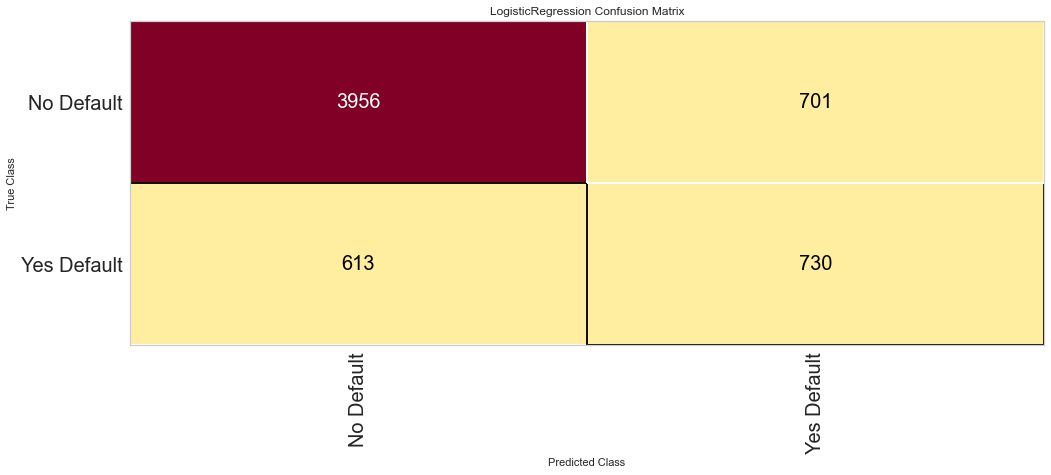

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [140]:
#get model accuracy and create a confusion matrix

#create class labels for confusion matrix
#classes = ['No Heart Disease Reported','Heart Disease Reported']
label_encoder = {0: 'No Default', 1: 'Yes Default'}

#initialize the confusion matrix
cm_chi = ConfusionMatrix(lr_weight_chi, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm_chi.fit(X_test_chi, y_test_chi)

#creates the confusion matrix and gets the accuracy
mod_acc_chi = 100*cm_chi.score(X_test_chi, y_test_chi)
print('Model Accuracy: ', round(mod_acc_chi,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm_chi.show()

C:\Users\adamska\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


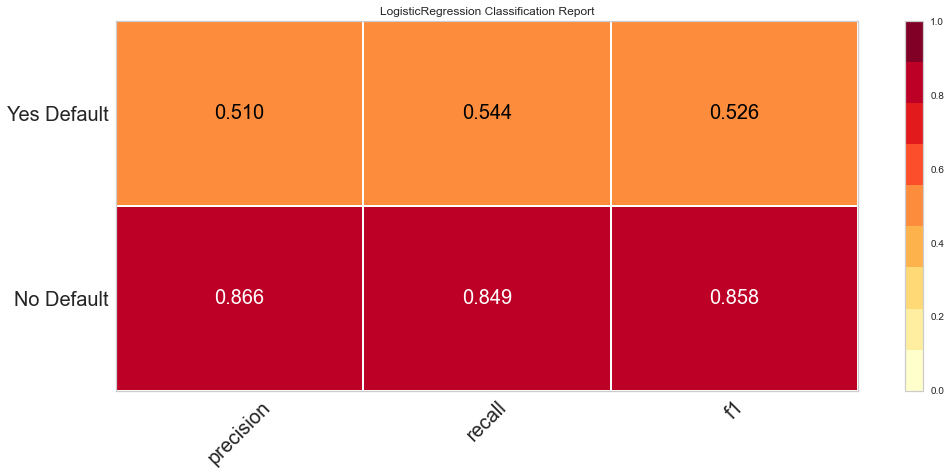

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [141]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report_chi = ClassificationReport(lr_weight_chi, encoder = label_encoder)

#fit the classification report to the test data
class_report_chi.fit(X_train_chi, y_test_chi)  
#evaluate the model on the test data
class_report_chi.score(X_test_chi, y_test_chi)  
class_report_chi.show()

C:\Users\adamska\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


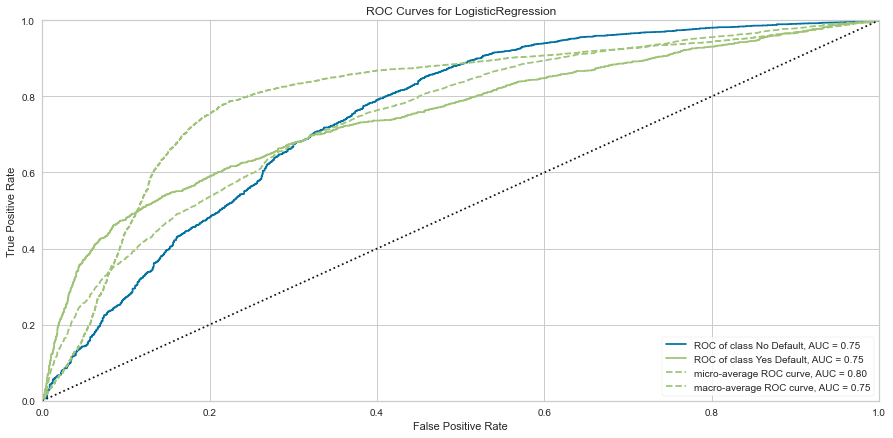

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [143]:
# ROC and AUC
#Instantiate the visualizer
roc_curve_chi = ROCAUC(lr_weight_chi, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve_chi.fit(X_test_chi, y_test_chi)
#evaluate the model on the test data
roc_curve_chi.score(X_test_chi, y_test_chi)  
roc_curve_chi.show()

### Model Findings
$\bullet$ With the model performance metrics in mind (see analysis above), the logistic regression models with all 23 Features and only the 5 Best Features performed relatively the same. This proves that the 5 Best Features are in fact as predictive of the target variable as all Features.